# __EDA for Resturants and Cafes and Shops in Riyadh, Saudi Arabia__

## __Contents:__
> 1. Overview
> 2. Installation
> 3. Read datasets
> 4. Explore Information
> 5. Handling Missing Values
> 6. Handling String Values
> 7. Export the cleaned dataset
> 8. Questions & Answers


---


## __Overview:__

In this project i take dataset from kaggle [here](https://www.kaggle.com/fahd09/riyadh-restaurants-20k)

the cleaned version of this dataset it's on my gitHum [here](https://github.com/rymyf/DS-project-of-restaurants-cafes-in-Riyadh)

Also for more explanation of locations in my dataset i used another dataset wich contains districts. from [gitHub](https://github.com/homaily/Saudi-Arabia-Regions-Cities-and-Districts/tree/master/geojson)

---

## __Installation:__

In [3]:
# # Install GDAL and Geopandas
# !apt install gdal-bin python-gdal python3-gdal --quiet
# !apt install python3-rtree --quiet
# !pip install git+git://github.com/geopandas/geopandas.git --quiet
# !pip install descartes --quiet
# !pip install geopy
# !pip install plotly_express
# !pip install ipython-autotime

time: 756 µs (started: 2021-11-18 00:28:56 +03:00)


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import geopy
import matplotlib.pyplot as plt

%load_ext autotime
%config InlineBackend.figure_format = 'svg'

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 42.3 ms (started: 2021-11-18 00:28:57 +03:00)


In [5]:
%reload_ext autotime

time: 2.33 ms (started: 2021-11-18 00:28:57 +03:00)


---

## __Read Datasets:__

In [6]:
# 1 - read the handled (from file handling_str_dataset) dataset of riyadh's cafes and resturants 
df = pd.read_excel('handled_dataset.xlsx')

# 2 - convert to Geopandas Geodataframe
gdf_df = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lng, df.lat))

# 3 - read dataset of districts
districts = gpd.read_file('districts.geojson')

# 4 - Join the GeoDataFrames
df_dis = gdf_df.sjoin(districts, how="inner", predicate='intersects')
df_dis

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


Unnamed: 0                           name            categories  \
0               0               مطعم وقت الشواية     Arabic Restaurant   
1               1                   ديوانية عكاظ                  Cafe   
2               2            شاهي جمر راعي الجمس                  Cafe   
3               3                     غدير الشام     Arabic Restaurant   
13             13                      Starbucks                  Cafe   
...           ...                            ...                   ...   
16858       19338  قهوة العمدة || Alomdah Coffee            Food Truck   
16580       19016                        الكنيسة                  Cafe   
16669       19119                   المكان السري                  Cafe   
16711       19168  C Store Dammam Riyadh Highway  Fast Food Restaurant   
16786       19257                    فوال الطائف   Sandwich Restaurant   

                                      address        lat        lng     price  \
0      الرياض 14723, المملكة العربية السعودية  24.518983  46.656981  Moderate   
1      الرياض 14726, المملكة العربية السعودية  24.518511  46.669149     Cheap   
2      الرياض 14726, المملكة العربية السعودية  24.519314  46.670041     Cheap   
3                    المملكة العربية السعودية  24.519520  46.671660  Moderate   
13     الرياض 14723, المملكة العربية السعودية  24.522543  46.648867     Cheap   
...                                       ...        ...        ...       ...   
16858                المملكة العربية السعودية  24.943424  46.581831     Cheap   
16580  الرياض 13616, المملكة العربية السعودية  24.859723  46.855539     Cheap   
16669  الرياض 13616, المملكة العربية السعودية  24.870172  46.871157     Cheap   
16711        الرياض, المملكة العربية السعودية  24.875099  46.876825     Cheap   
16786  الرياض 13618, المملكة العربية السعودية  24.886690  46.866339     Cheap   

       likes  photos  tips  rating  ratingSignals                   geometry  \
0        0.0       0     0     NaN            NaN  POINT (46.65698 24.51898)   
1        0.0       2     0     NaN            NaN  POINT (46.66915 24.51851)   
2        0.0       0     0     NaN            NaN  POINT (46.67004 24.51931)   
3        0.0       0     0     NaN            NaN  POINT (46.67166 24.51952)   
13       1.0      16     0     8.1            1.0  POINT (46.64887 24.52254)   
...      ...     ...   ...     ...            ...                        ...   
16858    1.0       0     0     NaN            NaN  POINT (46.58183 24.94342)   
16580    0.0       7     0     NaN            NaN  POINT (46.85554 24.85972)   
16669    0.0       4     0     NaN            NaN  POINT (46.87116 24.87017)   
16711    1.0       6     0     NaN            NaN  POINT (46.87683 24.87510)   
16786    1.0       0     0     NaN            NaN  POINT (46.86634 24.88669)   

       index_right  district_id  city_id  region_id    name_ar         name_en  
0               64  10100003065        3          1    حي عكاظ      Okaz Dist.  
1               64  10100003065        3          1    حي عكاظ      Okaz Dist.  
2               64  10100003065        3          1    حي عكاظ      Okaz Dist.  
3               64  10100003065        3          1    حي عكاظ      Okaz Dist.  
13              64  10100003065        3          1    حي عكاظ      Okaz Dist.  
...            ...          ...      ...        ...        ...             ...  
16858          146  10100003148        3          1  حي العارض   Al Arid Dist.  
16580          181  10100003190        3          1  حي البيان  Al Bayan Dist.  
16669          181  10100003190        3          1  حي البيان  Al Bayan Dist.  
16711          181  10100003190        3          1  حي البيان  Al Bayan Dist.  
16786          181  10100003190        3          1  حي البيان  Al Bayan Dist.  

[16460 rows x 19 columns]

time: 18 s (started: 2021-11-18 00:28:57 +03:00)


---

## __Explore Information:__

In [7]:
df_dis.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16460 entries, 0 to 16786
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     16460 non-null  int64   
 1   name           16460 non-null  object  
 2   categories     16460 non-null  object  
 3   address        16460 non-null  object  
 4   lat            16460 non-null  float64 
 5   lng            16460 non-null  float64 
 6   price          16460 non-null  object  
 7   likes          16458 non-null  float64 
 8   photos         16460 non-null  int64   
 9   tips           16460 non-null  int64   
 10  rating         6957 non-null   float64 
 11  ratingSignals  6957 non-null   float64 
 12  geometry       16460 non-null  geometry
 13  index_right    16460 non-null  int64   
 14  district_id    16460 non-null  int64   
 15  city_id        16460 non-null  int64   
 16  region_id      16460 non-null  int64   
 17  name_ar        16460 no

In [8]:
df_dis.describe()

Unnamed: 0           lat           lng         likes        photos  \
count  16460.000000  16460.000000  16460.000000  16458.000000  16460.000000   
mean    9520.050547     24.720105     46.697413     68.996901    179.821081   
std     5483.521433      0.080308      0.073544    306.927397   1020.517600   
min        0.000000     24.469683     46.272777      0.000000      0.000000   
25%     4808.750000     24.674254     46.643018      0.000000      1.000000   
50%     9529.500000     24.735569     46.692290      3.000000      4.000000   
75%    14246.250000     24.780962     46.754230     19.000000     25.000000   
max    19360.000000     24.943424     46.940912   9984.000000  25811.000000   

               tips       rating  ratingSignals   index_right   district_id  \
count  16460.000000  6957.000000    6957.000000  16460.000000  1.646000e+04   
mean      18.430255     7.570001     212.653730     89.665735  1.010001e+10   
std       79.394674     0.932569     575.347524     53.250813  9.567022e+04   
min        0.000000     4.400000       0.000000      0.000000  1.010000e+10   
25%        0.000000     6.900000      14.000000     50.000000  1.010000e+10   
50%        1.000000     7.700000      39.000000     87.000000  1.010000e+10   
75%        5.000000     8.300000     154.000000    135.000000  1.010000e+10   
max     2301.000000     9.600000   12376.000000    393.000000  1.010099e+10   

            city_id  region_id  
count  16460.000000    16460.0  
mean      14.237060        1.0  
std       95.679532        0.0  
min        3.000000        1.0  
25%        3.000000        1.0  
50%        3.000000        1.0  
75%        3.000000        1.0  
max      990.000000        1.0

time: 170 ms (started: 2021-11-18 00:29:15 +03:00)


In [9]:
df_dis.size

312740

time: 8.52 ms (started: 2021-11-18 00:29:15 +03:00)


In [10]:
df_dis.shape

(16460, 19)

time: 8.27 ms (started: 2021-11-18 00:29:15 +03:00)


In [11]:
df_dis.columns

Index(['Unnamed: 0', 'name', 'categories', 'address', 'lat', 'lng', 'price',
       'likes', 'photos', 'tips', 'rating', 'ratingSignals', 'geometry',
       'index_right', 'district_id', 'city_id', 'region_id', 'name_ar',
       'name_en'],
      dtype='object')

time: 9.29 ms (started: 2021-11-18 00:29:15 +03:00)


In [12]:
df_dis.categories.nunique()

23

time: 17 ms (started: 2021-11-18 00:29:15 +03:00)


---

## __Handling Missing Values:__

### Calculate the number of nulls in rating and ratingSignals after dropping:

In [13]:
print("Number of nulls in rating column: ",df_dis.rating.isna().sum())
print("Number of nulls in ratingSignals column: ",df_dis.ratingSignals.isna().sum())

Number of nulls in rating column:  9503
Number of nulls in ratingSignals column:  9503
time: 10.5 ms (started: 2021-11-18 00:29:15 +03:00)


### Filling Missing values in rating and ratingSignals columns:

1. First calculate the sum of rating and ratingSignal for each price type:

In [14]:
rate_med = df_dis.groupby('price')[['rating']].sum()
sign_med = df_dis.groupby('price')[['ratingSignals']].sum()

time: 20.2 ms (started: 2021-11-18 00:29:15 +03:00)


2. Second divide the sum of ratings and ratingSignals by number of rows based on price type:

In [15]:
rate_med['rating']['Cheap'] /= df_dis.shape[0]
rate_med['rating']['Moderate'] /= df_dis.shape[0]
rate_med['rating']['Expensive'] /= df_dis.shape[0]
rate_med['rating']['Very Expensive'] /= df_dis.shape[0]
rate_med

rating
price                   
Cheap           2.528256
Expensive       0.084465
Moderate        0.569095
Very Expensive  0.017728

time: 19.7 ms (started: 2021-11-18 00:29:16 +03:00)


In [16]:
sign_med['ratingSignals']['Cheap'] /= df_dis.shape[0]
sign_med['ratingSignals']['Moderate'] /= df_dis.shape[0]
sign_med['ratingSignals']['Expensive'] /= df_dis.shape[0]
sign_med['ratingSignals']['Very Expensive'] /= df_dis.shape[0]

sign_med

ratingSignals
price                        
Cheap               51.183597
Expensive           13.990279
Moderate            22.867740
Very Expensive       1.838821

time: 17 ms (started: 2021-11-18 00:29:16 +03:00)


3. Third Fill null values in rating column based on price type:

In [17]:
# Fill null values in rating column based on price 
df_dis.loc[df_dis.price.str.contains('Cheap')& df_dis.rating.isnull() , 'rating'] = rate_med['rating']['Cheap']
df_dis.loc[df_dis.price.str.contains('Moderate')& df_dis.rating.isnull() , 'rating'] = rate_med['rating']['Moderate']
df_dis.loc[df_dis.price.str.contains('Expensive')& df_dis.rating.isnull() , 'rating'] = rate_med['rating']['Expensive']
df_dis.loc[df_dis.price.str.contains('Very Expensive')& df_dis.rating.isnull() , 'rating'] = rate_med['rating']['Very Expensive']

df_dis.rating.isna().sum()

0

time: 88.7 ms (started: 2021-11-18 00:29:16 +03:00)


3. Fourth Fill null values in ratingSignals column based on price type:

In [18]:
# Fill null values in rating column based on price 
df_dis.loc[df_dis.price.str.contains('Cheap')& df_dis.ratingSignals.isnull() , 'ratingSignals'] = sign_med['ratingSignals']['Cheap']
df_dis.loc[df_dis.price.str.contains('Moderate')& df_dis.ratingSignals.isnull() , 'ratingSignals'] = sign_med['ratingSignals']['Moderate']
df_dis.loc[df_dis.price.str.contains('Expensive')& df_dis.ratingSignals.isnull() , 'ratingSignals'] = sign_med['ratingSignals']['Expensive']
df_dis.loc[df_dis.price.str.contains('Very Expensive')& df_dis.ratingSignals.isnull() , 'ratingSignals'] = sign_med['ratingSignals']['Very Expensive']

df_dis.ratingSignals.isna().sum()

0

time: 128 ms (started: 2021-11-18 00:29:16 +03:00)


### Filling Missing values in likes column:

1. First calculate the sum of likes based on price type:

In [19]:
like_med = df_dis.groupby('price')[['likes']].sum() 

time: 17.2 ms (started: 2021-11-18 00:29:16 +03:00)


2. Second divide the sum of likes by number of rows based on price type:

In [20]:
like_med['likes']['Cheap'] /= df_dis.shape[0]
like_med['likes']['Moderate'] /= df_dis.shape[0]
like_med['likes']['Expensive'] /= df_dis.shape[0]
like_med['likes']['Very Expensive'] /= df_dis.shape[0]

like_med

likes
price                    
Cheap           40.136999
Expensive       10.649028
Moderate        16.823937
Very Expensive   1.378554

time: 15.3 ms (started: 2021-11-18 00:29:16 +03:00)


3. Third fill null values in likes column based on price type:

In [21]:
df_dis.loc[df_dis.price.str.contains('Cheap')& df_dis.likes.isnull() , 'likes'] = like_med['likes']['Cheap']
df_dis.loc[df_dis.price.str.contains('Moderate')& df_dis.likes.isnull() , 'likes'] = like_med['likes']['Moderate']
df_dis.loc[df_dis.price.str.contains('Expensive')& df_dis.likes.isnull() , 'likes'] = like_med['likes']['Expensive']
df_dis.loc[df_dis.price.str.contains('Very Expensive')& df_dis.likes.isnull() , 'likes'] = like_med['likes']['Very Expensive']

df_dis.likes.isna().sum()

0

time: 79.2 ms (started: 2021-11-18 00:29:16 +03:00)


### Check for null values in DataFrame:

In [22]:
df_dis.isna().sum()

Unnamed: 0       0
name             0
categories       0
address          0
lat              0
lng              0
price            0
likes            0
photos           0
tips             0
rating           0
ratingSignals    0
geometry         0
index_right      0
district_id      0
city_id          0
region_id        0
name_ar          0
name_en          0
dtype: int64

time: 46.6 ms (started: 2021-11-18 00:29:17 +03:00)


---

## __Cleaning Dataset__:

### Change column:

In [23]:
df_dis.rename(columns={'Unnamed: 0':'ID'},inplace=True)
df_dis['ID'] = [id for id in range(df_dis.shape[0]) ]

time: 15.9 ms (started: 2021-11-18 00:29:17 +03:00)


In [24]:
df_dis

ID                           name            categories  \
0          0               مطعم وقت الشواية     Arabic Restaurant   
1          1                   ديوانية عكاظ                  Cafe   
2          2            شاهي جمر راعي الجمس                  Cafe   
3          3                     غدير الشام     Arabic Restaurant   
13         4                      Starbucks                  Cafe   
...      ...                            ...                   ...   
16858  16455  قهوة العمدة || Alomdah Coffee            Food Truck   
16580  16456                        الكنيسة                  Cafe   
16669  16457                   المكان السري                  Cafe   
16711  16458  C Store Dammam Riyadh Highway  Fast Food Restaurant   
16786  16459                    فوال الطائف   Sandwich Restaurant   

                                      address        lat        lng     price  \
0      الرياض 14723, المملكة العربية السعودية  24.518983  46.656981  Moderate   
1      الرياض 14726, المملكة العربية السعودية  24.518511  46.669149     Cheap   
2      الرياض 14726, المملكة العربية السعودية  24.519314  46.670041     Cheap   
3                    المملكة العربية السعودية  24.519520  46.671660  Moderate   
13     الرياض 14723, المملكة العربية السعودية  24.522543  46.648867     Cheap   
...                                       ...        ...        ...       ...   
16858                المملكة العربية السعودية  24.943424  46.581831     Cheap   
16580  الرياض 13616, المملكة العربية السعودية  24.859723  46.855539     Cheap   
16669  الرياض 13616, المملكة العربية السعودية  24.870172  46.871157     Cheap   
16711        الرياض, المملكة العربية السعودية  24.875099  46.876825     Cheap   
16786  الرياض 13618, المملكة العربية السعودية  24.886690  46.866339     Cheap   

       likes  photos  tips    rating  ratingSignals  \
0        0.0       0     0  0.569095      22.867740   
1        0.0       2     0  2.528256      51.183597   
2        0.0       0     0  2.528256      51.183597   
3        0.0       0     0  0.569095      22.867740   
13       1.0      16     0  8.100000       1.000000   
...      ...     ...   ...       ...            ...   
16858    1.0       0     0  2.528256      51.183597   
16580    0.0       7     0  2.528256      51.183597   
16669    0.0       4     0  2.528256      51.183597   
16711    1.0       6     0  2.528256      51.183597   
16786    1.0       0     0  2.528256      51.183597   

                        geometry  index_right  district_id  city_id  \
0      POINT (46.65698 24.51898)           64  10100003065        3   
1      POINT (46.66915 24.51851)           64  10100003065        3   
2      POINT (46.67004 24.51931)           64  10100003065        3   
3      POINT (46.67166 24.51952)           64  10100003065        3   
13     POINT (46.64887 24.52254)           64  10100003065        3   
...                          ...          ...          ...      ...   
16858  POINT (46.58183 24.94342)          146  10100003148        3   
16580  POINT (46.85554 24.85972)          181  10100003190        3   
16669  POINT (46.87116 24.87017)          181  10100003190        3   
16711  POINT (46.87683 24.87510)          181  10100003190        3   
16786  POINT (46.86634 24.88669)          181  10100003190        3   

       region_id    name_ar         name_en  
0              1    حي عكاظ      Okaz Dist.  
1              1    حي عكاظ      Okaz Dist.  
2              1    حي عكاظ      Okaz Dist.  
3              1    حي عكاظ      Okaz Dist.  
13             1    حي عكاظ      Okaz Dist.  
...          ...        ...             ...  
16858          1  حي العارض   Al Arid Dist.  
16580          1  حي البيان  Al Bayan Dist.  
16669          1  حي البيان  Al Bayan Dist.  
16711          1  حي البيان  Al Bayan Dist.  
16786          1  حي البيان  Al Bayan Dist.  

[16460 rows x 19 columns]

time: 96.6 ms (started: 2021-11-18 00:29:17 +03:00)


### Clear Whitespaces:

In [25]:
# strip whitespaces in columns
df_dis.columns.str.strip()

Index(['ID', 'name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals', 'geometry', 'index_right',
       'district_id', 'city_id', 'region_id', 'name_ar', 'name_en'],
      dtype='object')

time: 11.1 ms (started: 2021-11-18 00:29:17 +03:00)


In [26]:
# strip whitespaces in values of multiple columns
cols = ['name', 'categories', 'price','address','name_en','name_ar']
df_dis[cols] = df_dis[cols].apply(lambda x: x.str.strip())

time: 144 ms (started: 2021-11-18 00:29:17 +03:00)


In [27]:
df_dis

ID                           name            categories  \
0          0               مطعم وقت الشواية     Arabic Restaurant   
1          1                   ديوانية عكاظ                  Cafe   
2          2            شاهي جمر راعي الجمس                  Cafe   
3          3                     غدير الشام     Arabic Restaurant   
13         4                      Starbucks                  Cafe   
...      ...                            ...                   ...   
16858  16455  قهوة العمدة || Alomdah Coffee            Food Truck   
16580  16456                        الكنيسة                  Cafe   
16669  16457                   المكان السري                  Cafe   
16711  16458  C Store Dammam Riyadh Highway  Fast Food Restaurant   
16786  16459                    فوال الطائف   Sandwich Restaurant   

                                      address        lat        lng     price  \
0      الرياض 14723, المملكة العربية السعودية  24.518983  46.656981  Moderate   
1      الرياض 14726, المملكة العربية السعودية  24.518511  46.669149     Cheap   
2      الرياض 14726, المملكة العربية السعودية  24.519314  46.670041     Cheap   
3                    المملكة العربية السعودية  24.519520  46.671660  Moderate   
13     الرياض 14723, المملكة العربية السعودية  24.522543  46.648867     Cheap   
...                                       ...        ...        ...       ...   
16858                المملكة العربية السعودية  24.943424  46.581831     Cheap   
16580  الرياض 13616, المملكة العربية السعودية  24.859723  46.855539     Cheap   
16669  الرياض 13616, المملكة العربية السعودية  24.870172  46.871157     Cheap   
16711        الرياض, المملكة العربية السعودية  24.875099  46.876825     Cheap   
16786  الرياض 13618, المملكة العربية السعودية  24.886690  46.866339     Cheap   

       likes  photos  tips    rating  ratingSignals  \
0        0.0       0     0  0.569095      22.867740   
1        0.0       2     0  2.528256      51.183597   
2        0.0       0     0  2.528256      51.183597   
3        0.0       0     0  0.569095      22.867740   
13       1.0      16     0  8.100000       1.000000   
...      ...     ...   ...       ...            ...   
16858    1.0       0     0  2.528256      51.183597   
16580    0.0       7     0  2.528256      51.183597   
16669    0.0       4     0  2.528256      51.183597   
16711    1.0       6     0  2.528256      51.183597   
16786    1.0       0     0  2.528256      51.183597   

                        geometry  index_right  district_id  city_id  \
0      POINT (46.65698 24.51898)           64  10100003065        3   
1      POINT (46.66915 24.51851)           64  10100003065        3   
2      POINT (46.67004 24.51931)           64  10100003065        3   
3      POINT (46.67166 24.51952)           64  10100003065        3   
13     POINT (46.64887 24.52254)           64  10100003065        3   
...                          ...          ...          ...      ...   
16858  POINT (46.58183 24.94342)          146  10100003148        3   
16580  POINT (46.85554 24.85972)          181  10100003190        3   
16669  POINT (46.87116 24.87017)          181  10100003190        3   
16711  POINT (46.87683 24.87510)          181  10100003190        3   
16786  POINT (46.86634 24.88669)          181  10100003190        3   

       region_id    name_ar         name_en  
0              1    حي عكاظ      Okaz Dist.  
1              1    حي عكاظ      Okaz Dist.  
2              1    حي عكاظ      Okaz Dist.  
3              1    حي عكاظ      Okaz Dist.  
13             1    حي عكاظ      Okaz Dist.  
...          ...        ...             ...  
16858          1  حي العارض   Al Arid Dist.  
16580          1  حي البيان  Al Bayan Dist.  
16669          1  حي البيان  Al Bayan Dist.  
16711          1  حي البيان  Al Bayan Dist.  
16786          1  حي البيان  Al Bayan Dist.  

[16460 rows x 19 columns]

time: 111 ms (started: 2021-11-18 00:29:17 +03:00)


---

## __Export the dataset after clean it:__

In [28]:
# df_dis.to_excel("cleaned_ryd_dist_dataset.xlsx")

time: 2.37 ms (started: 2021-11-18 00:29:17 +03:00)


---

## __Questions & Answers:__

#### 1. Is there a relationship between prices and ratings?

In [29]:
df_dis.price.value_counts()

Cheap             12973
Moderate           3140
Expensive           290
Very Expensive       57
Name: price, dtype: int64

time: 7.55 ms (started: 2021-11-18 00:29:17 +03:00)


In [30]:
# Create new column of type int for price
dic_price = {
        "Cheap":0,
        "Moderate":1,
        "Expensive ":2,
        "Very Expensive":3
}
df['price_encoded'] = df.price.map(dic_price)

time: 8.4 ms (started: 2021-11-18 00:29:18 +03:00)


In [31]:
price_rate = df_dis.groupby(['price'],as_index=False)['rating'].sum()
price_rate

price        rating
0           Cheap  60602.305407
1       Expensive   1399.506725
2        Moderate  10428.661756
3  Very Expensive    293.404842

time: 47.8 ms (started: 2021-11-18 00:29:18 +03:00)


Text(0, 0.5, 'Ratings')

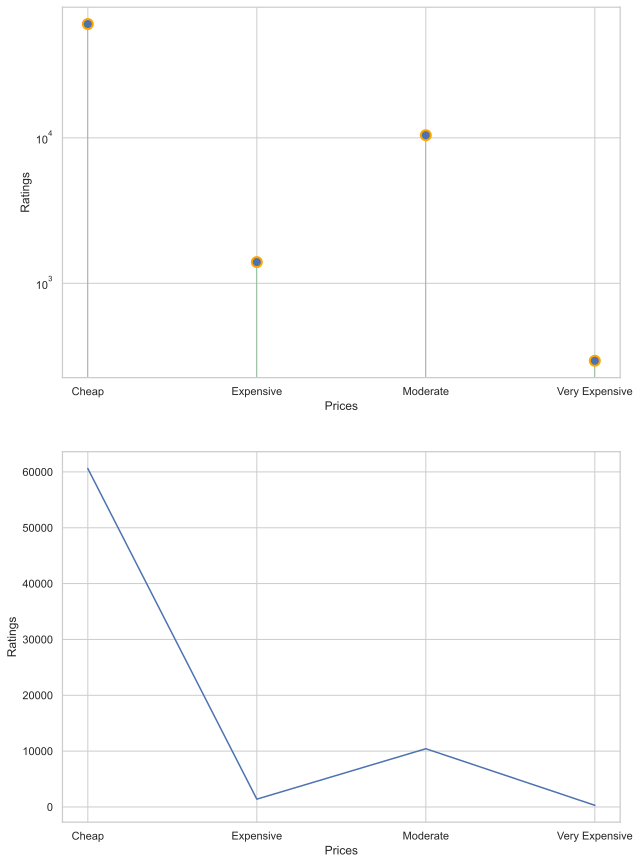

time: 1.33 s (started: 2021-11-18 00:29:18 +03:00)


In [32]:
plt.figure(figsize=[10,15])
plt.legend('title="Relationship between Price and Rating')
sns.set_theme(style="whitegrid")

plt.subplot(2,1,1)
(markers, stemlines, baseline) = plt.stem(price_rate.price, price_rate.rating);
plt.setp(stemlines, linestyle="-", color="g", linewidth=0.5 );
plt.setp(markers,markersize=10, markeredgecolor="orange",markeredgewidth=2)
plt.yscale('log');
plt.xlabel('Prices')
plt.ylabel('Ratings')

plt.subplot(2,1,2)
plt.plot(price_rate.price, price_rate.rating);
plt.xlabel('Prices')
plt.ylabel('Ratings')

#### 2. Does everyone who likes the place take a photo of it?

In [33]:
# First way: calculate the correlation between likes and photos
like_photo_corr = df_dis.likes.corr(df_dis.photos)
print('Correlation = ',like_photo_corr)
if like_photo_corr > 0:
    print("They are highly correlated!")
elif like_photo_corr < 0:
    print("They have a low correlation.")
else:
    print("They don't have a relationship.")


Correlation =  0.7948700416060449
They are highly correlated!
time: 14.8 ms (started: 2021-11-18 00:29:19 +03:00)


In [34]:
like_norm = (df_dis.likes-np.mean(df_dis.likes))/np.std(df_dis.likes)
photo_norm = (df_dis.photos-np.mean(df_dis.photos))/np.std(df_dis.photos)

# Plot correlation values
plt.figure(figsize=[15,5])
sns.set_theme(style="whitegrid")

plt.subplot(1,2,1)
plt.scatter(like_norm,photo_norm,alpha = 0.2,s=50)
plt.axis([-1, 10, -1, 10]); # [x_min, x_max, y_min, y_max]
plt.xlabel('Likes')
plt.ylabel('Photos')

plt.subplot(1,2,2)
plt.plot(like_norm,alpha = 0.5)
plt.plot(photo_norm,alpha = 0.5)
plt.legend(['Likes','Photos'])

time: 2.24 s (started: 2021-11-18 00:29:20 +03:00)


#### 3. Does the location affect the prices of the place?

In [35]:
# This code bellow is draft
# df.groupby('OnBitSeq')['KMeans'].apply(lambda x: x.mode().iloc[0])
# gb_dis = df_dis.groupby(['name_en','district_id'], as_index=False)[['price']].apply(lambda x: x.mode().iloc[0])
# gb_dis

# Groupby district, then count rows for each price !
gb_dis = df_dis.groupby(['name_en', 'price'])[['ID']].count().sort_values(ascending=False ,by='ID')
gb_dis = gb_dis.reset_index()
gb_dis= gb_dis.set_index('name_en')
gb_dis.head(20)

price   ID
name_en                          
Hitteen Dist.          Cheap  409
Al Malqa Dist.         Cheap  397
Al Olaya Dist.         Cheap  299
Dhahrat Laban Dist.    Cheap  282
Al Rabwah Dist.        Cheap  277
Al Yasmeen Dist.       Cheap  271
Al Aqeeq Dist.         Cheap  265
Qurtubah Dist.         Cheap  249
Al Rawdah Dist.        Cheap  246
Al Sahafah Dist.       Cheap  238
Al Hamra Dist.         Cheap  225
Al Munisiyah Dist.     Cheap  221
Al Sulaimaniyah Dist.  Cheap  217
King Saud University   Cheap  216
Al Rabie Dist.         Cheap  212
Al Narjis Dist.        Cheap  211
Al Nakheel Dist.       Cheap  198
Al Yarmuk Dist.        Cheap  194
Al Rawabi Dist.        Cheap  175
West Suwaidi Dist.     Cheap  174

time: 29.8 ms (started: 2021-11-18 00:29:23 +03:00)


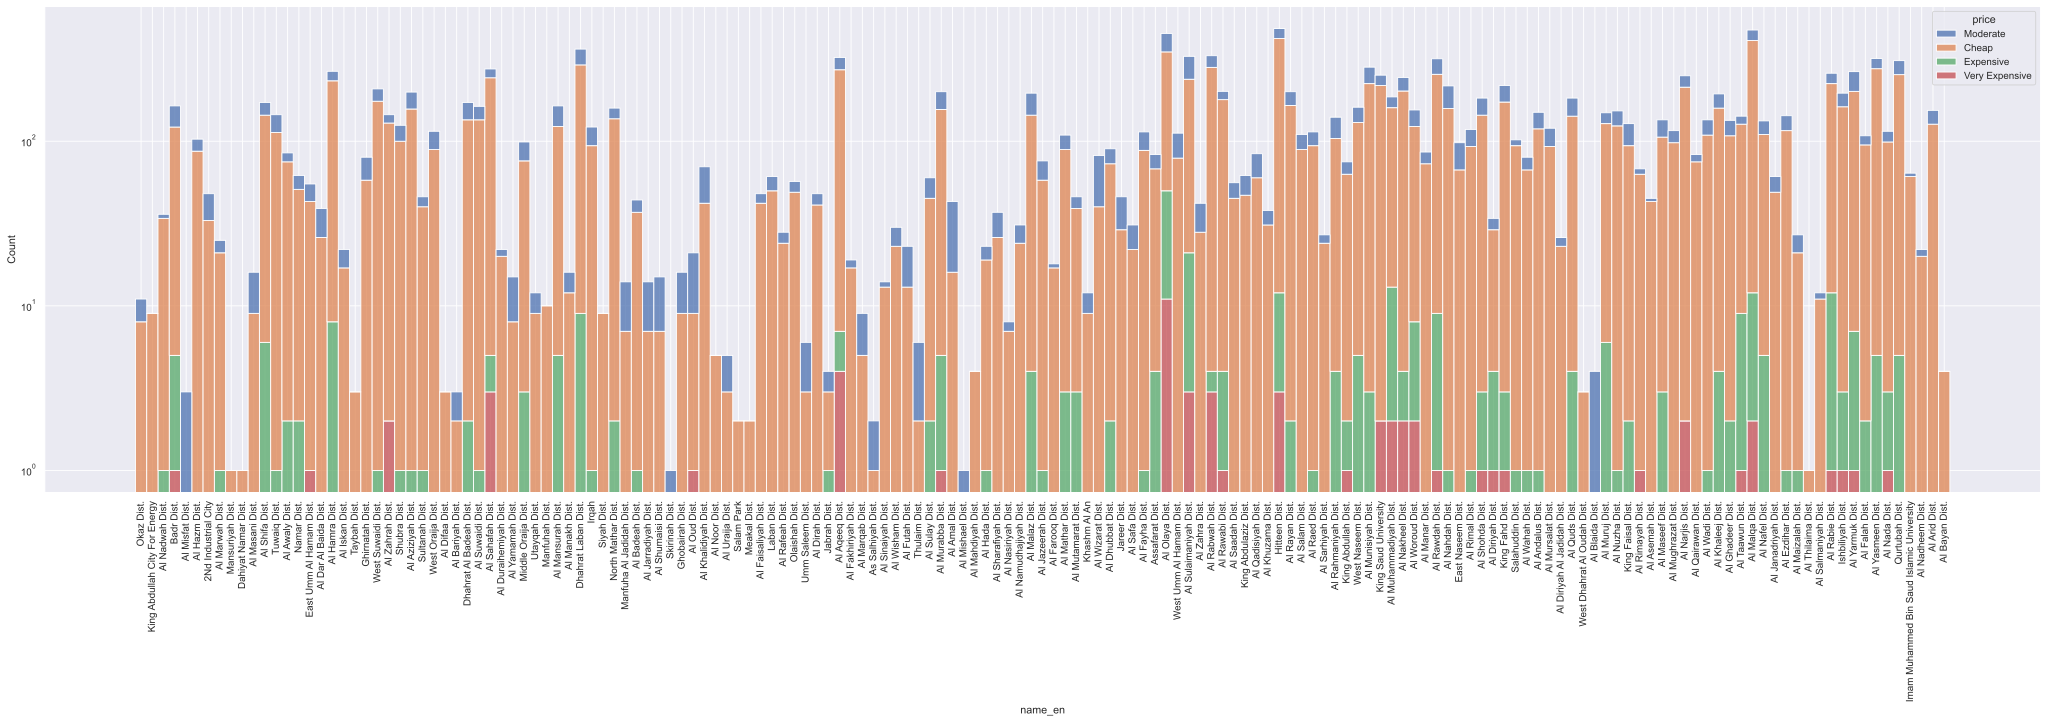

time: 12 s (started: 2021-11-18 00:29:23 +03:00)


In [36]:
# sns.barplot(x ='price' ,y='district_id',data=gb_dis);

# viz
# sns.set(style="dark")
# g = sns.catplot(x='name_en',
#                 y= 'ID',
#                 hue='price',
#                 data=gb_dis,
#                 kind='bar',
#                 ci=None,height=6
#                    );
# g.set_axis_labels("Districts", "Count")

# order=['Cheap','Moderate','Expensive', 'Very Expensive']
# sample = gb_dis.sample()

plt.figure(figsize=(40, 10))
sns.set_theme(style="darkgrid")
ax = sns.histplot(data=df_dis,x="name_en",hue='price',multiple='stack',binwidth=2);
plt.xticks(rotation='vertical');
ax.set_yscale("log")

# sns.catplot(x="name_en", y= df_dis.price , hue="price", data=df_dis);
# sns.countplot(x="name_en", hue="price", data=df_dis);

# chart = sns.barplot(x= sample.name_en, y=sample.ID, palette=sns.color_palette("BuGn_r") )
# chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')

# plt.tight_layout()

In [37]:
ryd_map = districts[ districts.city_id == 3 ]
sjoined_df = gpd.sjoin(gdf_df, ryd_map , op="within")
sjoined_df.head()

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-37-f70e11b4e0ee>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  sjoined_df = gpd.sjoin(gdf_df, ryd_map , op="within")


Unnamed: 0                 name         categories  \
0            0     مطعم وقت الشواية  Arabic Restaurant   
1            1         ديوانية عكاظ               Cafe   
2            2  شاهي جمر راعي الجمس               Cafe   
3            3           غدير الشام  Arabic Restaurant   
13          13            Starbucks               Cafe   

                                   address        lat        lng     price  \
0   الرياض 14723, المملكة العربية السعودية  24.518983  46.656981  Moderate   
1   الرياض 14726, المملكة العربية السعودية  24.518511  46.669149     Cheap   
2   الرياض 14726, المملكة العربية السعودية  24.519314  46.670041     Cheap   
3                 المملكة العربية السعودية  24.519520  46.671660  Moderate   
13  الرياض 14723, المملكة العربية السعودية  24.522543  46.648867     Cheap   

    likes  photos  tips  rating  ratingSignals                   geometry  \
0     0.0       0     0     NaN            NaN  POINT (46.65698 24.51898)   
1     0.0       2     0     NaN            NaN  POINT (46.66915 24.51851)   
2     0.0       0     0     NaN            NaN  POINT (46.67004 24.51931)   
3     0.0       0     0     NaN            NaN  POINT (46.67166 24.51952)   
13    1.0      16     0     8.1            1.0  POINT (46.64887 24.52254)   

    price_encoded  index_right  district_id  city_id  region_id  name_ar  \
0             1.0           64  10100003065        3          1  حي عكاظ   
1             0.0           64  10100003065        3          1  حي عكاظ   
2             0.0           64  10100003065        3          1  حي عكاظ   
3             1.0           64  10100003065        3          1  حي عكاظ   
13            0.0           64  10100003065        3          1  حي عكاظ   

       name_en  
0   Okaz Dist.  
1   Okaz Dist.  
2   Okaz Dist.  
3   Okaz Dist.  
13  Okaz Dist.

time: 1.12 s (started: 2021-11-18 00:29:35 +03:00)


#### 4. What are the most common areas where cafes and restaurants are located?

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="whitegrid")
ryd_map.plot(color="Gray", ax= ax);
df_dis.plot(ax=ax, markersize=10,color='g')

<AxesSubplot:>

time: 2.68 s (started: 2021-11-18 00:29:36 +03:00)


In [39]:
ryd_map.crs == df_dis.crs

False

time: 3.65 ms (started: 2021-11-18 00:29:39 +03:00)


In [40]:
sjoined_df = gpd.sjoin(gdf_df, ryd_map , op="within")
sjoined_df.head()

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-40-d3e1f2c4eb43>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  sjoined_df = gpd.sjoin(gdf_df, ryd_map , op="within")


Unnamed: 0                 name         categories  \
0            0     مطعم وقت الشواية  Arabic Restaurant   
1            1         ديوانية عكاظ               Cafe   
2            2  شاهي جمر راعي الجمس               Cafe   
3            3           غدير الشام  Arabic Restaurant   
13          13            Starbucks               Cafe   

                                   address        lat        lng     price  \
0   الرياض 14723, المملكة العربية السعودية  24.518983  46.656981  Moderate   
1   الرياض 14726, المملكة العربية السعودية  24.518511  46.669149     Cheap   
2   الرياض 14726, المملكة العربية السعودية  24.519314  46.670041     Cheap   
3                 المملكة العربية السعودية  24.519520  46.671660  Moderate   
13  الرياض 14723, المملكة العربية السعودية  24.522543  46.648867     Cheap   

    likes  photos  tips  rating  ratingSignals                   geometry  \
0     0.0       0     0     NaN            NaN  POINT (46.65698 24.51898)   
1     0.0       2     0     NaN            NaN  POINT (46.66915 24.51851)   
2     0.0       0     0     NaN            NaN  POINT (46.67004 24.51931)   
3     0.0       0     0     NaN            NaN  POINT (46.67166 24.51952)   
13    1.0      16     0     8.1            1.0  POINT (46.64887 24.52254)   

    price_encoded  index_right  district_id  city_id  region_id  name_ar  \
0             1.0           64  10100003065        3          1  حي عكاظ   
1             0.0           64  10100003065        3          1  حي عكاظ   
2             0.0           64  10100003065        3          1  حي عكاظ   
3             1.0           64  10100003065        3          1  حي عكاظ   
13            0.0           64  10100003065        3          1  حي عكاظ   

       name_en  
0   Okaz Dist.  
1   Okaz Dist.  
2   Okaz Dist.  
3   Okaz Dist.  
13  Okaz Dist.

time: 398 ms (started: 2021-11-18 00:29:39 +03:00)


In [41]:
# Groupby districts, then calculate number of places!
grouped = sjoined_df.groupby(["district_id",'name_en']).size()
common_areas = grouped.to_frame().reset_index()
common_areas.columns = ['district_id', 'name_en','places_count']
common_areas = common_areas.sort_values(ascending= False, by='places_count')
common_areas.head()

district_id              name_en  places_count
136  10100003144        Hitteen Dist.           484
137  10100003145       Al Malqa Dist.           474
72   10100003075       Al Olaya Dist.           452
135  10100003143  Dhahrat Laban Dist.           363
46   10100003047      Al Rabwah Dist.           331

time: 26.9 ms (started: 2021-11-18 00:29:40 +03:00)


In [42]:
merged_areas = ryd_map.merge(common_areas, on=['district_id','name_en'], how='right')
merged_areas.head()

district_id  city_id  region_id      name_ar              name_en  \
0  10100003144        3          1      حي حطين        Hitteen Dist.   
1  10100003145        3          1    حي الملقا       Al Malqa Dist.   
2  10100003075        3          1    حي العليا       Al Olaya Dist.   
3  10100003143        3          1  حي ظهرة لبن  Dhahrat Laban Dist.   
4  10100003047        3          1    حي الربوة      Al Rabwah Dist.   

                                            geometry  places_count  
0  POLYGON ((46.62933 24.75344, 46.62644 24.75914...           484  
1  POLYGON ((46.62239 24.81019, 46.62087 24.81324...           474  
2  POLYGON ((46.68445 24.71172, 46.68215 24.71609...           452  
3  POLYGON ((46.56818 24.65821, 46.56783 24.65865...           363  
4  POLYGON ((46.77348 24.69469, 46.77336 24.69500...           331

time: 54.8 ms (started: 2021-11-18 00:29:40 +03:00)


In [43]:
merged_areas.shape[0] == common_areas.shape[0]

True

time: 4.87 ms (started: 2021-11-18 00:29:40 +03:00)


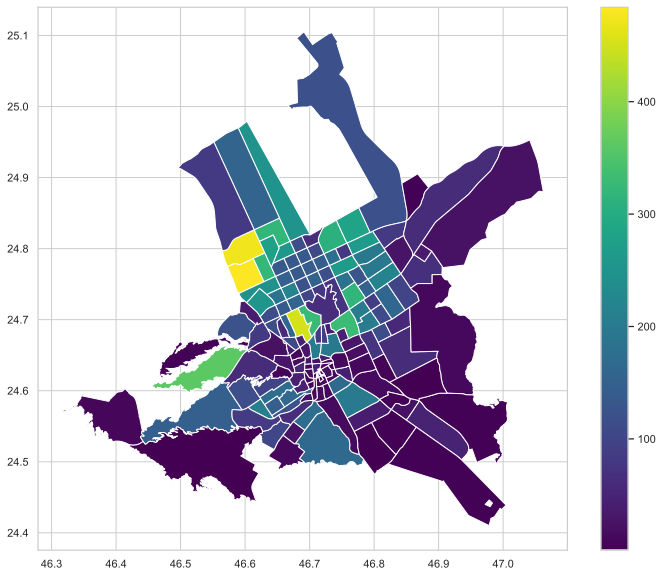

time: 798 ms (started: 2021-11-18 00:29:40 +03:00)


In [44]:
merged_areas.plot(column="places_count", cmap='viridis', legend=True, figsize=(12,10));

#### 5. What is the ratio of restaurants, cafes and shops?

In [45]:
n_rest = df_dis.categories.str.contains('Restaurant').sum()
n_cafe = df_dis.categories.str.contains('Cafe').sum()
n_shop = df_dis.categories.str.contains('Shop').sum()
n_truck = df_dis.categories.str.contains('Truck').sum()

print('Number of Restaurant',n_rest)
print('Number of Cafe',n_cafe)
print('Number of Shop',n_shop)
print('Number of Truck',n_truck)


Number of Restaurant 7780
Number of Cafe 4686
Number of Shop 3264
Number of Truck 730
time: 43.4 ms (started: 2021-11-18 00:29:41 +03:00)


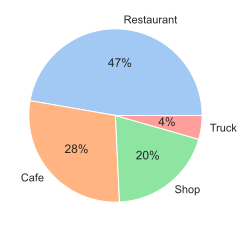

time: 167 ms (started: 2021-11-18 00:29:41 +03:00)


In [46]:
clor = sns.color_palette('pastel')
plt.pie([n_rest,n_cafe,n_shop,n_truck],labels=['Restaurant','Cafe','Shop','Truck'], colors=clor , autopct='%.0f%%' );

# plt.pie([n_rest,n_cafe],labels=['Restaurant','Cafe'])
# plt.bar(['Restaurant','Cafe','Shop','Truck'],[n_rest,n_cafe,n_shop,n_truck],color=['g','r','b','y'])

#### 6. What are people's preferences for the type of categories?

In [47]:

n_rest = df [df.categories.str.contains('Restaurant')]['likes'].sum()
n_cafe = df[ df.categories.str.contains('Cafe')]['likes'].sum()
n_shop = df[ df.categories.str.contains('Shop')]['likes'].sum()
n_truck = df[ df.categories.str.contains('Truck')]['likes'].sum()

print(n_rest)
print(n_cafe)
print(n_shop)
print(n_truck)

521571.0
464912.0
153806.0
7759.0
time: 63.2 ms (started: 2021-11-18 00:29:41 +03:00)


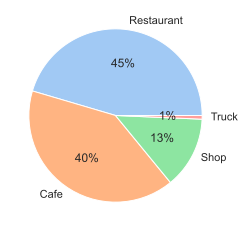

time: 273 ms (started: 2021-11-18 00:29:41 +03:00)


In [48]:
c = sns.color_palette('pastel')
plt.pie([n_rest,n_cafe,n_shop,n_truck],labels=['Restaurant','Cafe','Shop','Truck'], colors=c , autopct='%.0f%%' );

#### 7. What is the most liked type of restaurant?

In [49]:
# First get all resturants with their likes
rest = df_dis[df_dis.categories.str.contains('Restaurant')][['categories','likes']]

# Second group by the type of resturants and sum their likes then sort in descinding order
top_lik = (rest.groupby(['categories'], as_index=False))[['likes']].sum().sort_values(ascending=False,by='likes')

# Third print the top 5 types of returants the people liked
top_lik.head()

categories     likes
6   Fast Food Restaurant  164019.0
2      Arabic Restaurant   61660.0
13   Sandwich Restaurant   57112.0
10    Italian Restaurant   52189.0
5    European Restaurant   30738.0

time: 62.2 ms (started: 2021-11-18 00:29:42 +03:00)


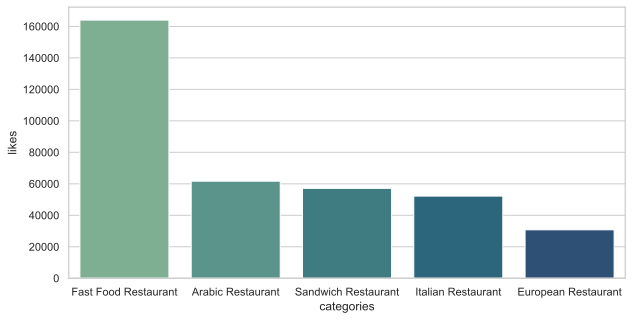

time: 456 ms (started: 2021-11-18 00:29:42 +03:00)


In [50]:
# Plot values
plt.figure(figsize=[10,5])
sns.barplot(x='categories',y='likes' ,data=top_lik.head(), palette='crest');

In [51]:
df_dis.shape

(16460, 19)

time: 4.32 ms (started: 2021-11-18 00:29:42 +03:00)
